In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


**Importing libraries**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing data from csv**

In [57]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [58]:
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


**Cleaning and visualization of data**

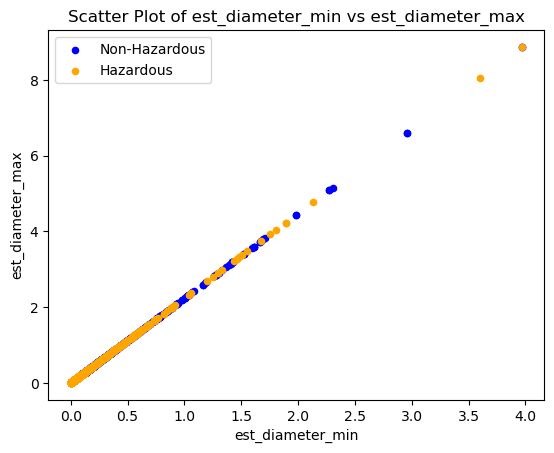

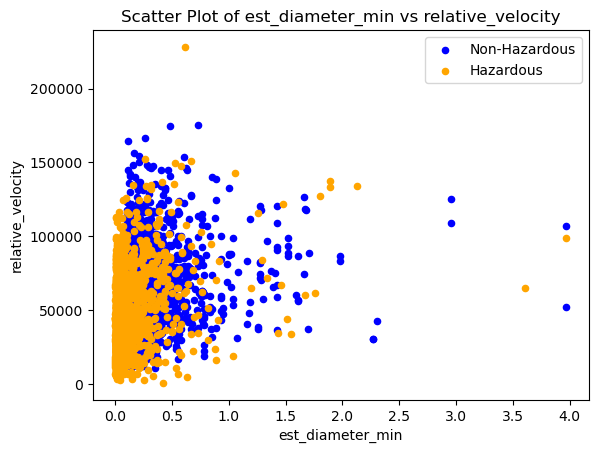

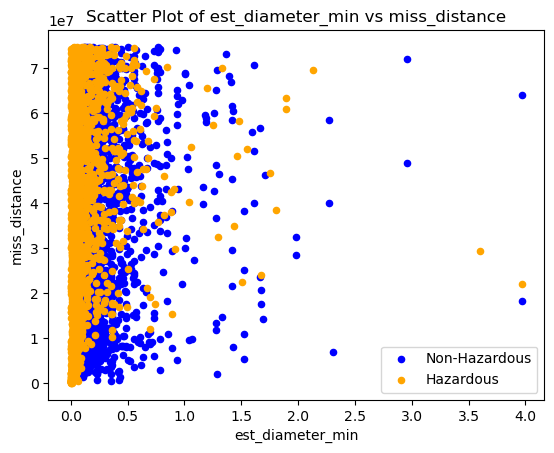

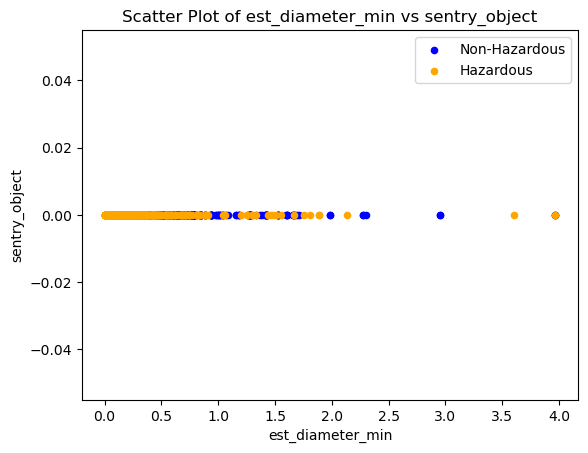

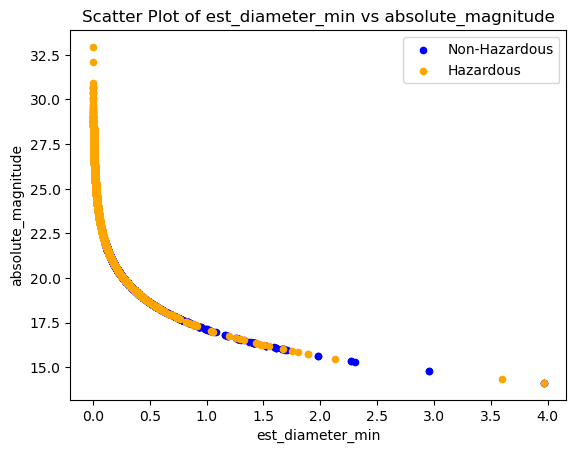

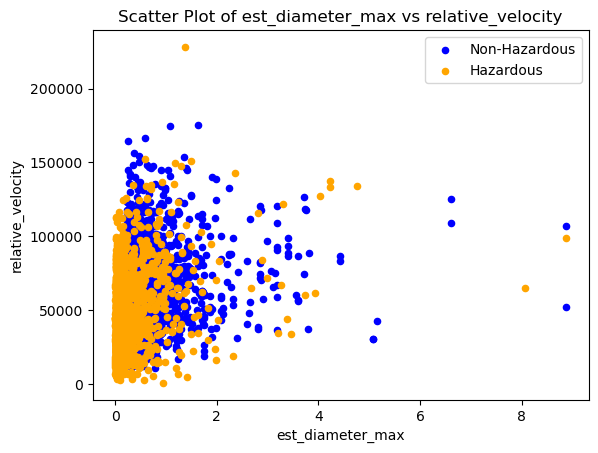

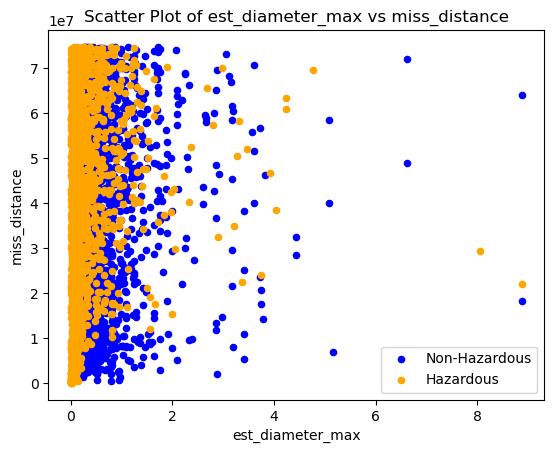

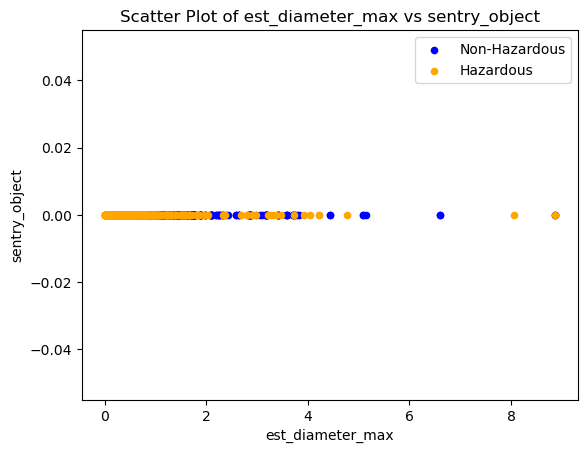

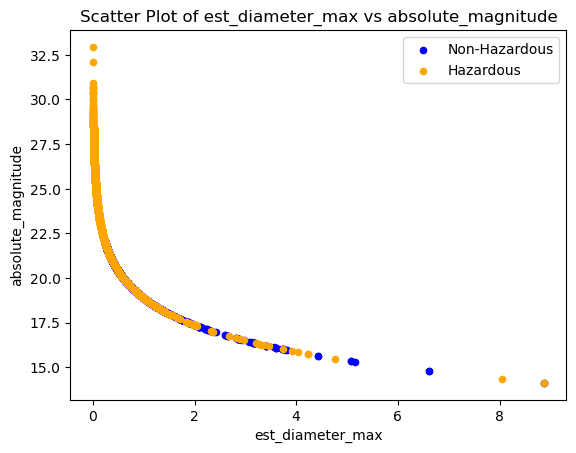

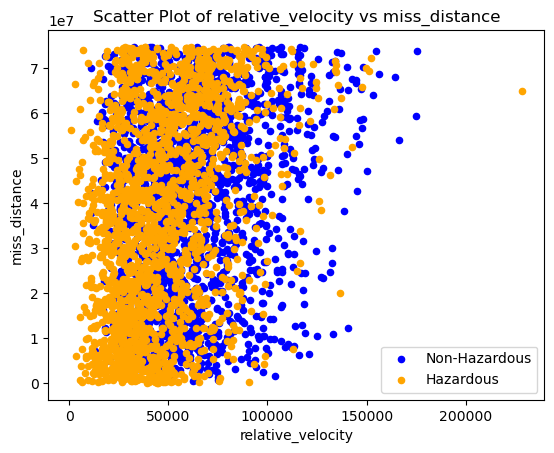

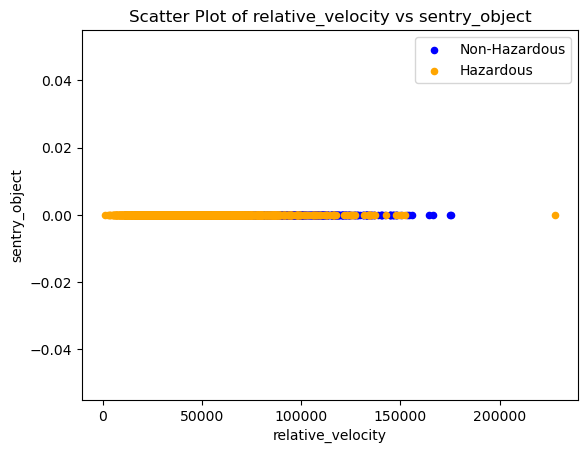

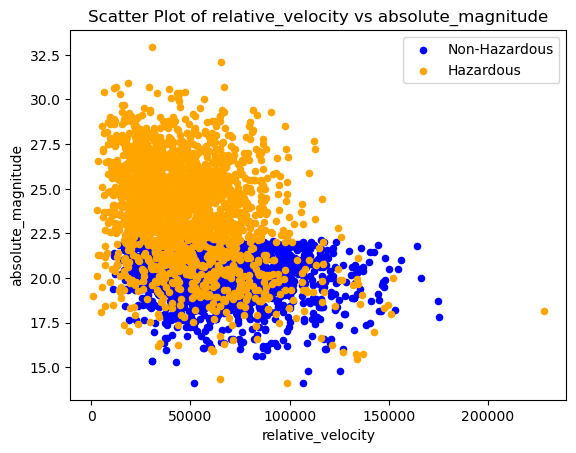

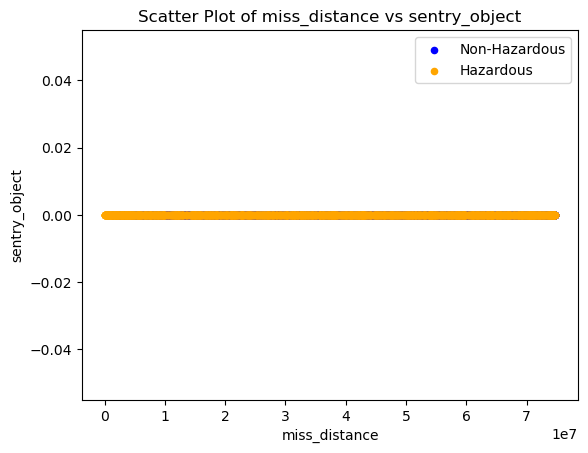

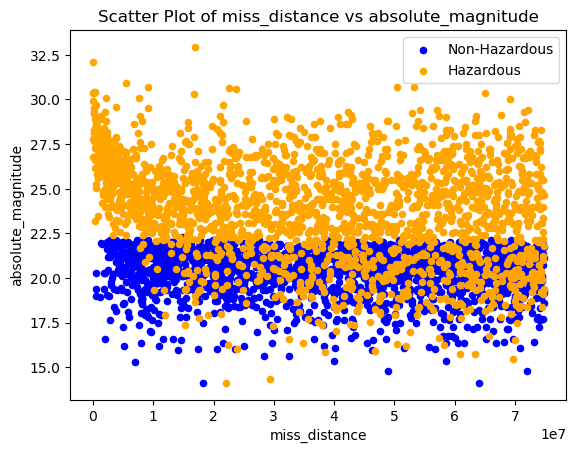

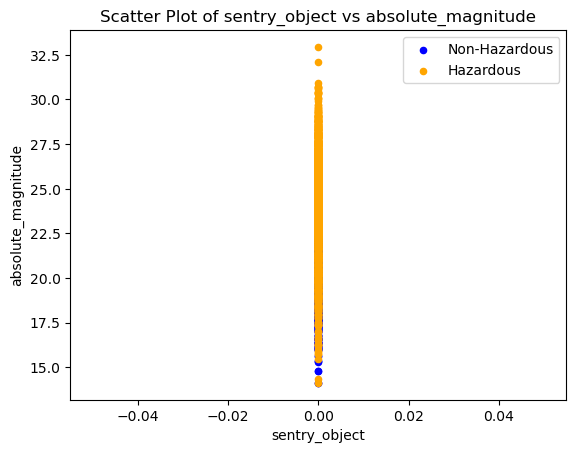

In [68]:
#converting boolean values into integer 
df["hazardous"]=df["hazardous"].astype(int)
df['sentry_object']=df['sentry_object'].astype(int)
#assigning 0 value to unsafe objects and 1 to safe objects
safe_df=df[df['hazardous']==1]
unsafe_df=df[df['hazardous']==0]

# Select a random subset of values from the safe and unsafe DataFrames
safe_df_sample = safe_df.sample(n=2000, random_state=42)
unsafe_df_sample = unsafe_df.sample(n=2000, random_state=42)
# Create a list of column names for visualization
columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object', 'absolute_magnitude']

# Iterate over each column pair and create scatter plots
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column_x = columns[i]
        column_y = columns[j]
        fig, ax = plt.subplots()
        safe_df_sample.plot(kind='scatter', x=column_x, y=column_y, color='blue', label='Non-Hazardous', ax=ax)
        unsafe_df_sample.plot(kind='scatter', x=column_x, y=column_y, color='orange', label='Hazardous', ax=ax)
        plt.xlabel(column_x)
        plt.ylabel(column_y)
        plt.title(f'Scatter Plot of {column_x} vs {column_y}')
        plt.legend()
        plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  int64  
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 6.9+ MB


**Removing unwanted columns**

In [62]:
rich_df=df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object', 'absolute_magnitude']]

X=np.asarray(rich_df)
y=np.array(df['hazardous'])

**Training and Testing using scikit learn library**

In [63]:
from sklearn import svm
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
precision_scores=[]
f1_scores=[]


for kernel in kernels:
#kernel='linear'
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    f1_scores.append(f1)

    print("Kernel:", kernel)
    print("Precision:", precision)
    print("F1-Score:", f1)
    #print(precision_scores)
    #print(f1_scores)

Kernel: linear
Precision: 1.0
F1-Score: 0.9655172413793104
Kernel: poly
Precision: 0.8333333333333334
F1-Score: 0.9090909090909091
Kernel: rbf
Precision: 0.8823529411764706
F1-Score: 0.9375
Kernel: sigmoid
Precision: 0.9333333333333333
F1-Score: 0.9333333333333333


**Results**

Line Chart

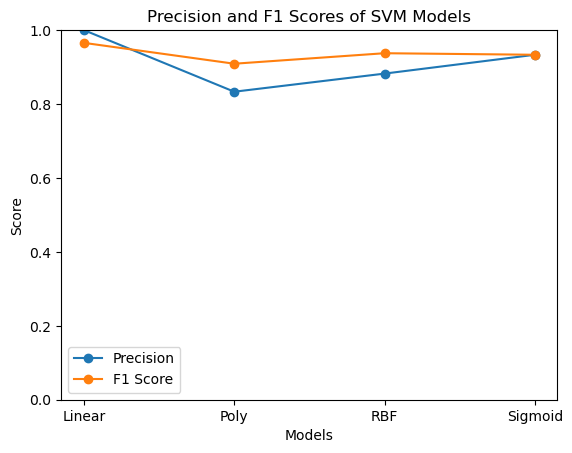

In [65]:
models = ['Linear', 'Poly', 'RBF', 'Sigmoid']


x = np.arange(len(models))


plt.plot(x, precision_scores, marker='o', label='Precision')
plt.plot(x, f1_scores, marker='o', label='F1 Score')

plt.xticks(x, models)

plt.ylim(0, 1)

plt.title('Precision and F1 Scores of SVM Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

plt.show()

Bar Graph

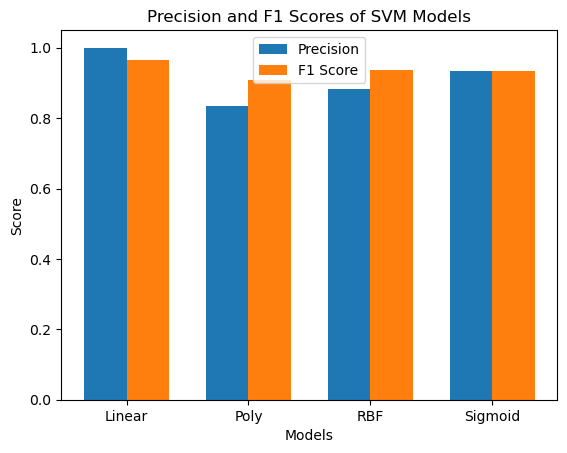

In [66]:
bar_width = 0.35

x = np.arange(len(models))

plt.bar(x, precision_scores, width=bar_width, label='Precision')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score')

plt.xticks(x + bar_width / 2, models)

plt.title('Precision and F1 Scores of SVM Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

plt.show()

Radar Chart

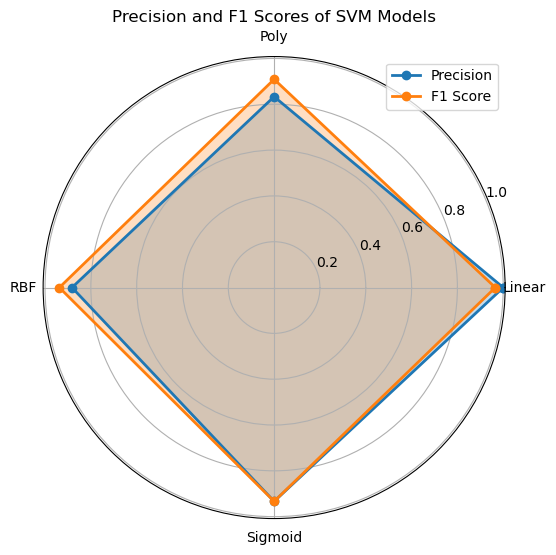

In [67]:
num_vars = len(precision_scores)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

ax.plot(angles, precision_scores + precision_scores[:1], 'o-', linewidth=2, label='Precision')
ax.plot(angles, f1_scores + f1_scores[:1], 'o-', linewidth=2, label='F1 Score')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

ax.fill(angles, precision_scores + precision_scores[:1], alpha=0.25)
ax.fill(angles, f1_scores + f1_scores[:1], alpha=0.25)

ax.legend(loc='upper right')
ax.set_title('Precision and F1 Scores of SVM Models')

plt.show()